In [ ]:
#TASK 1

# 1) Some of the aesthetics being used here to visualize the data include x,y position, color, and size.
# Income and income level are mapped to the x position, Life expectancy is being mapped to the Y position.
# World region is being mapped to the color aesthetic, and population is being mapped to the dot size. Year as label

In [90]:
import pandas as pd
import numpy as np

q1data = pd.read_csv(r"C:\Users\Luke Maier\Downloads\q1data.csv")

In [34]:
q1data

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [22]:
!pip install plotnine
from plotnine import ggplot, geom_point, aes, geom_point

C:\Users\Luke Maier\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


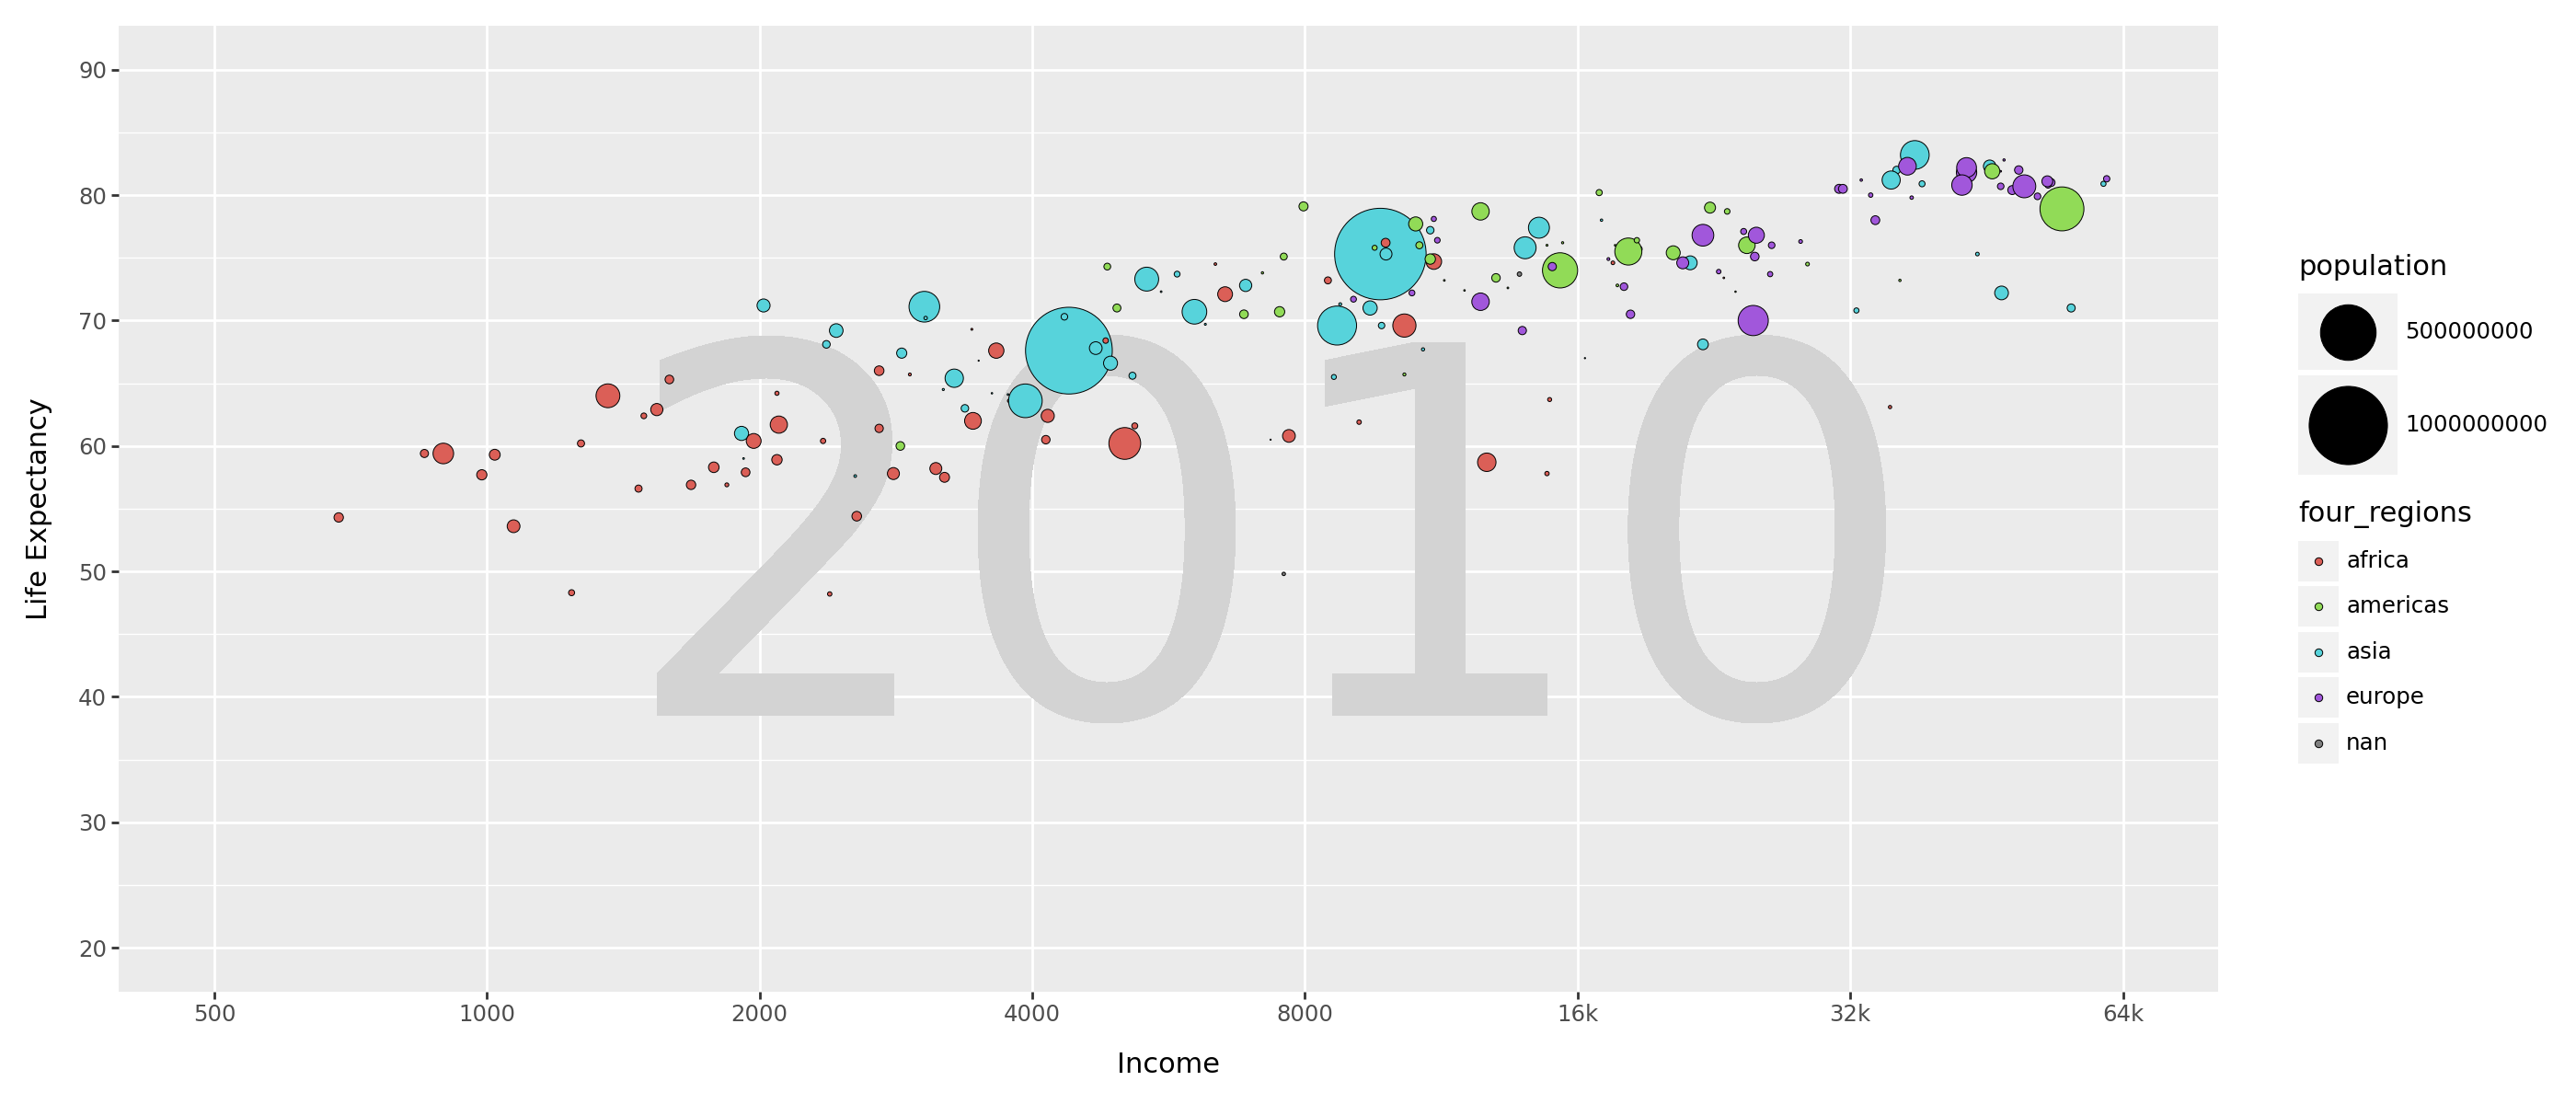

In [26]:
from plotnine import geom_text, labs, scale_x_continuous, scale_y_continuous, scale_size_continuous, theme, scale_fill_manual

(ggplot(q1data, aes(x='income', y='life_exp', size='population', fill='four_regions', label='country'))+
geom_text(aes(x=1400, y = 30, label = "2010"), size = 200, color = "lightgrey", alpha = .1, ha='left', va="bottom") +
geom_point(color = "black", stroke = .2 )+
labs(x="Income", y="Life Expectancy")+
scale_x_continuous(limits = (500,64000),breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],trans='log2',labels=[500, 1000, 2000, 4000, 8000, '16k', '32k', '64k'])+
scale_y_continuous(limits=(20,90),breaks=range(20,91, 10))+
scale_size_continuous(range=(0, 20)) + theme(figure_size = (14,6))

C:\Users\Luke Maier\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_tile : Removed 2 rows containing missing values.


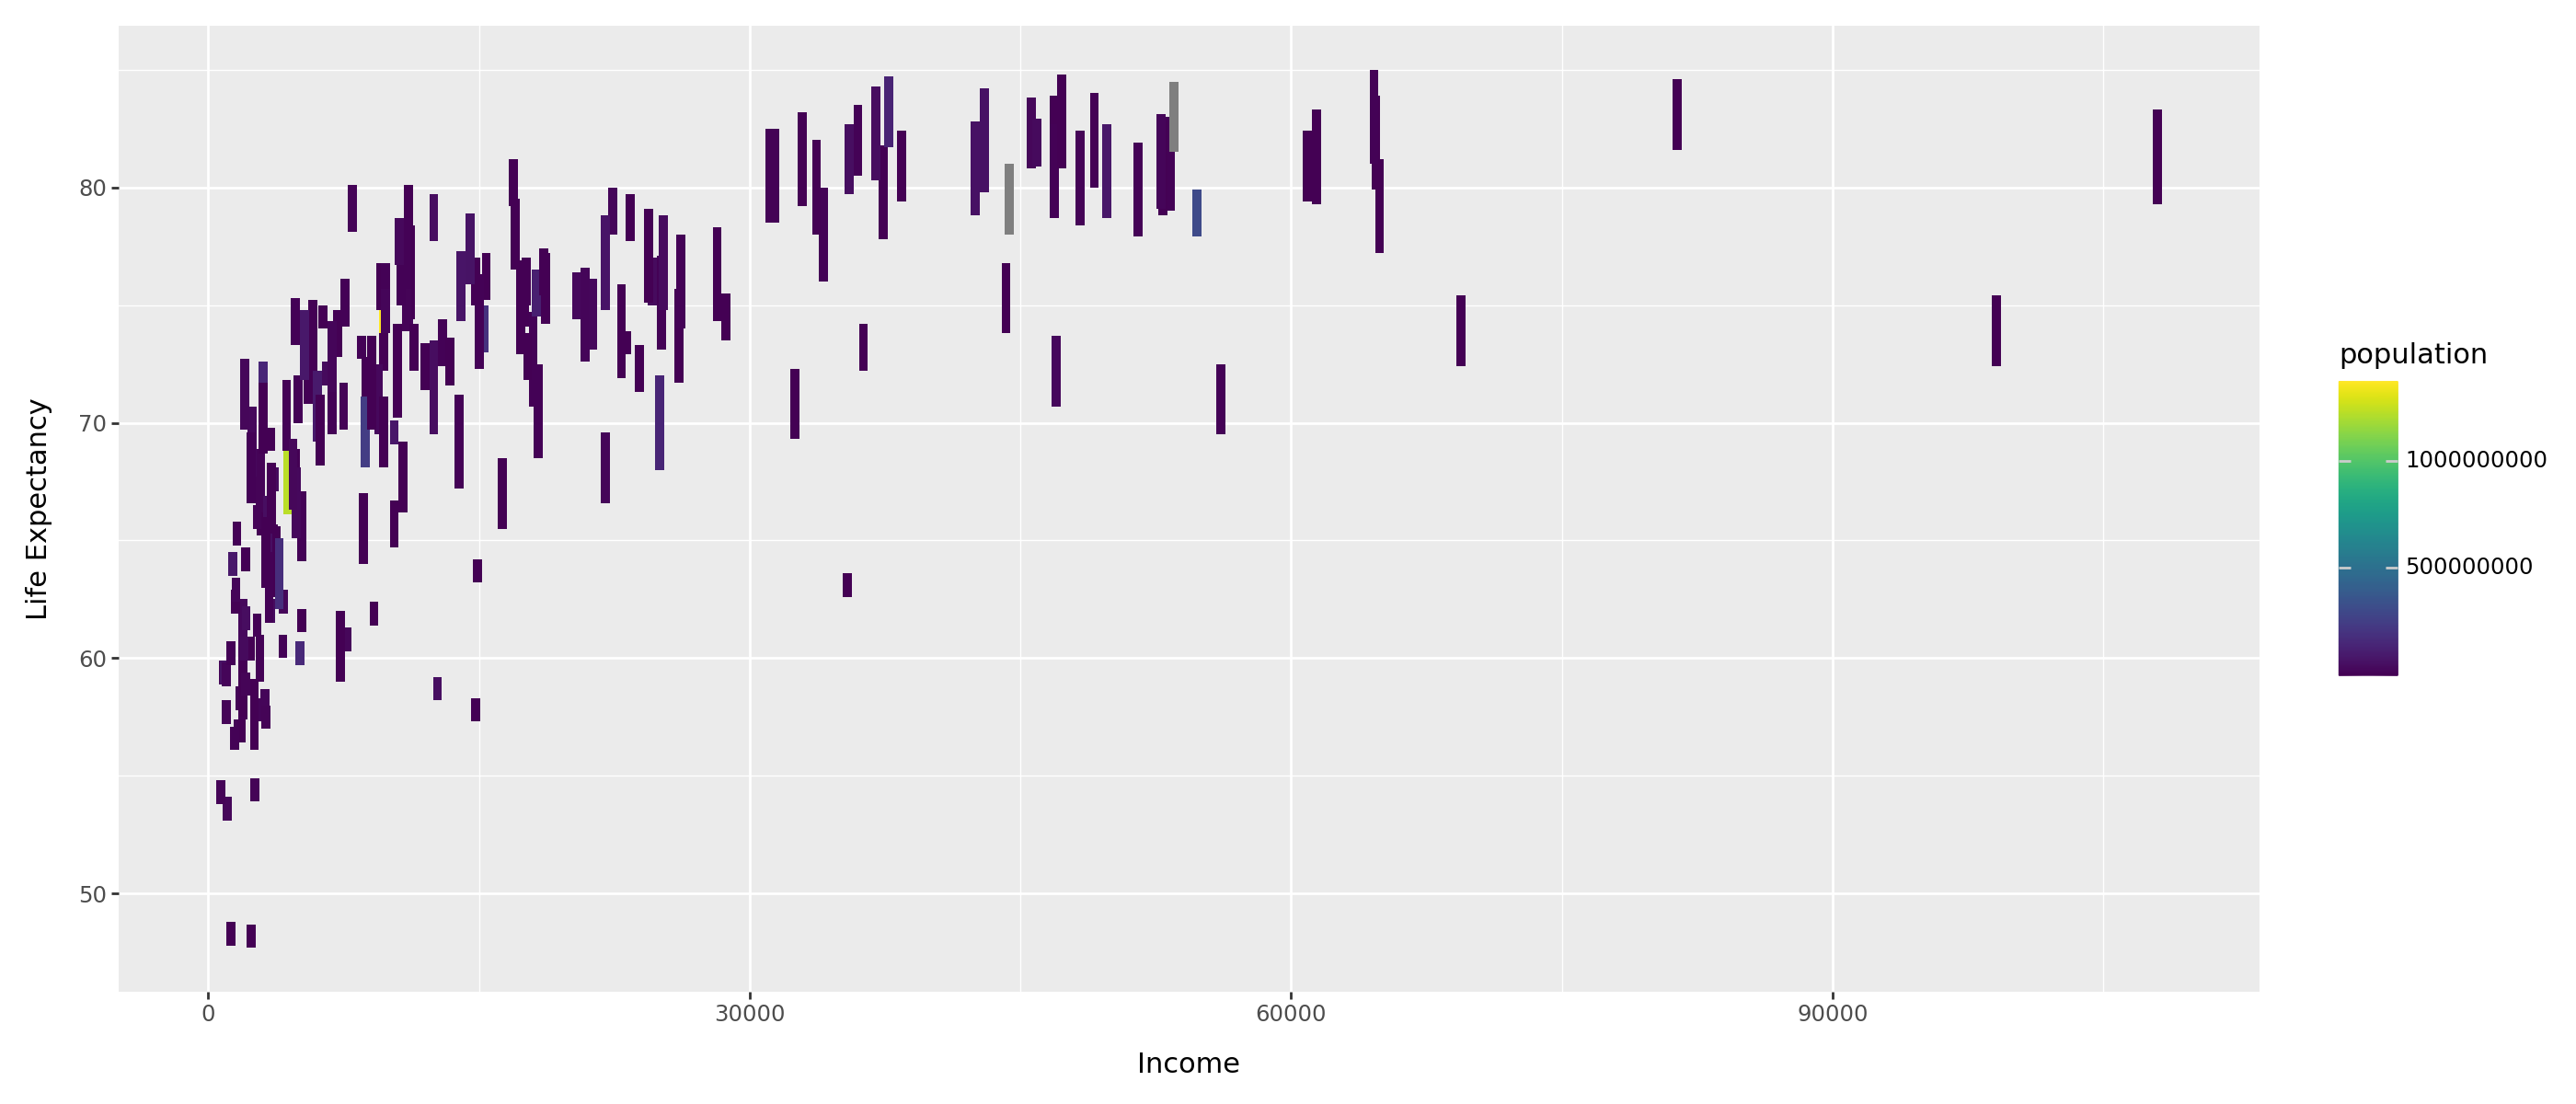

In [94]:
from plotnine import geom_tile

q1map = {'nan':0, 'africa':1, 'americas':2, 'asia':3, 'europe':4}
q1data['four_regions_map'] = q1data['four_regions'].map(q1map)


ggplot(q1data, aes(x='income', y='life_exp', fill='population', height = 'four_regions_map')) + geom_tile(width = 500)+ \
labs(x="Income", y="Life Expectancy") + theme(figure_size=(14, 6))

In [ ]:
# 4) I could also use geom_tile here. I could also use geom_tile here. I used mapping and the width scale in order to 
# incorporate the four_regions into the tile map which in turn made this plot less visually appealing. 

In [ ]:
# TASK 2

# The aesthetics being used here include color being mapped to region, exports as a percentage of GDP being mappped to the x-axis aes,
# imports as a percentage of GDP mapped to the y axis aes, energy use mapped to the bubble size aes, and the year as the label

In [44]:
q2data = pd.read_csv(r"C:\Users\Luke Maier\Downloads\q2data.csv")

q2data_clean = q2data.dropna()
q2data_clean

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
6,12.9,10.4,1660,1997,Argentina,americas,america,america_south,Latin America & Caribbean
7,52.8,19.0,610,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
9,20.5,19.6,5550,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...
198,22.9,22.6,2080,1997,Uzbekistan,asia,europe_central_asia,asia_west,Europe & Central Asia
200,22.7,20.9,2250,1997,Venezuela,americas,america,america_south,Latin America & Caribbean
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [77]:
print(q2data_clean.dtypes)
q2data_clean.loc[:, 'energy'] = pd.to_numeric(q2data_clean['energy'], errors='coerce')

imports              float64
exports              float64
energy               float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object


C:\Users\Luke Maier\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


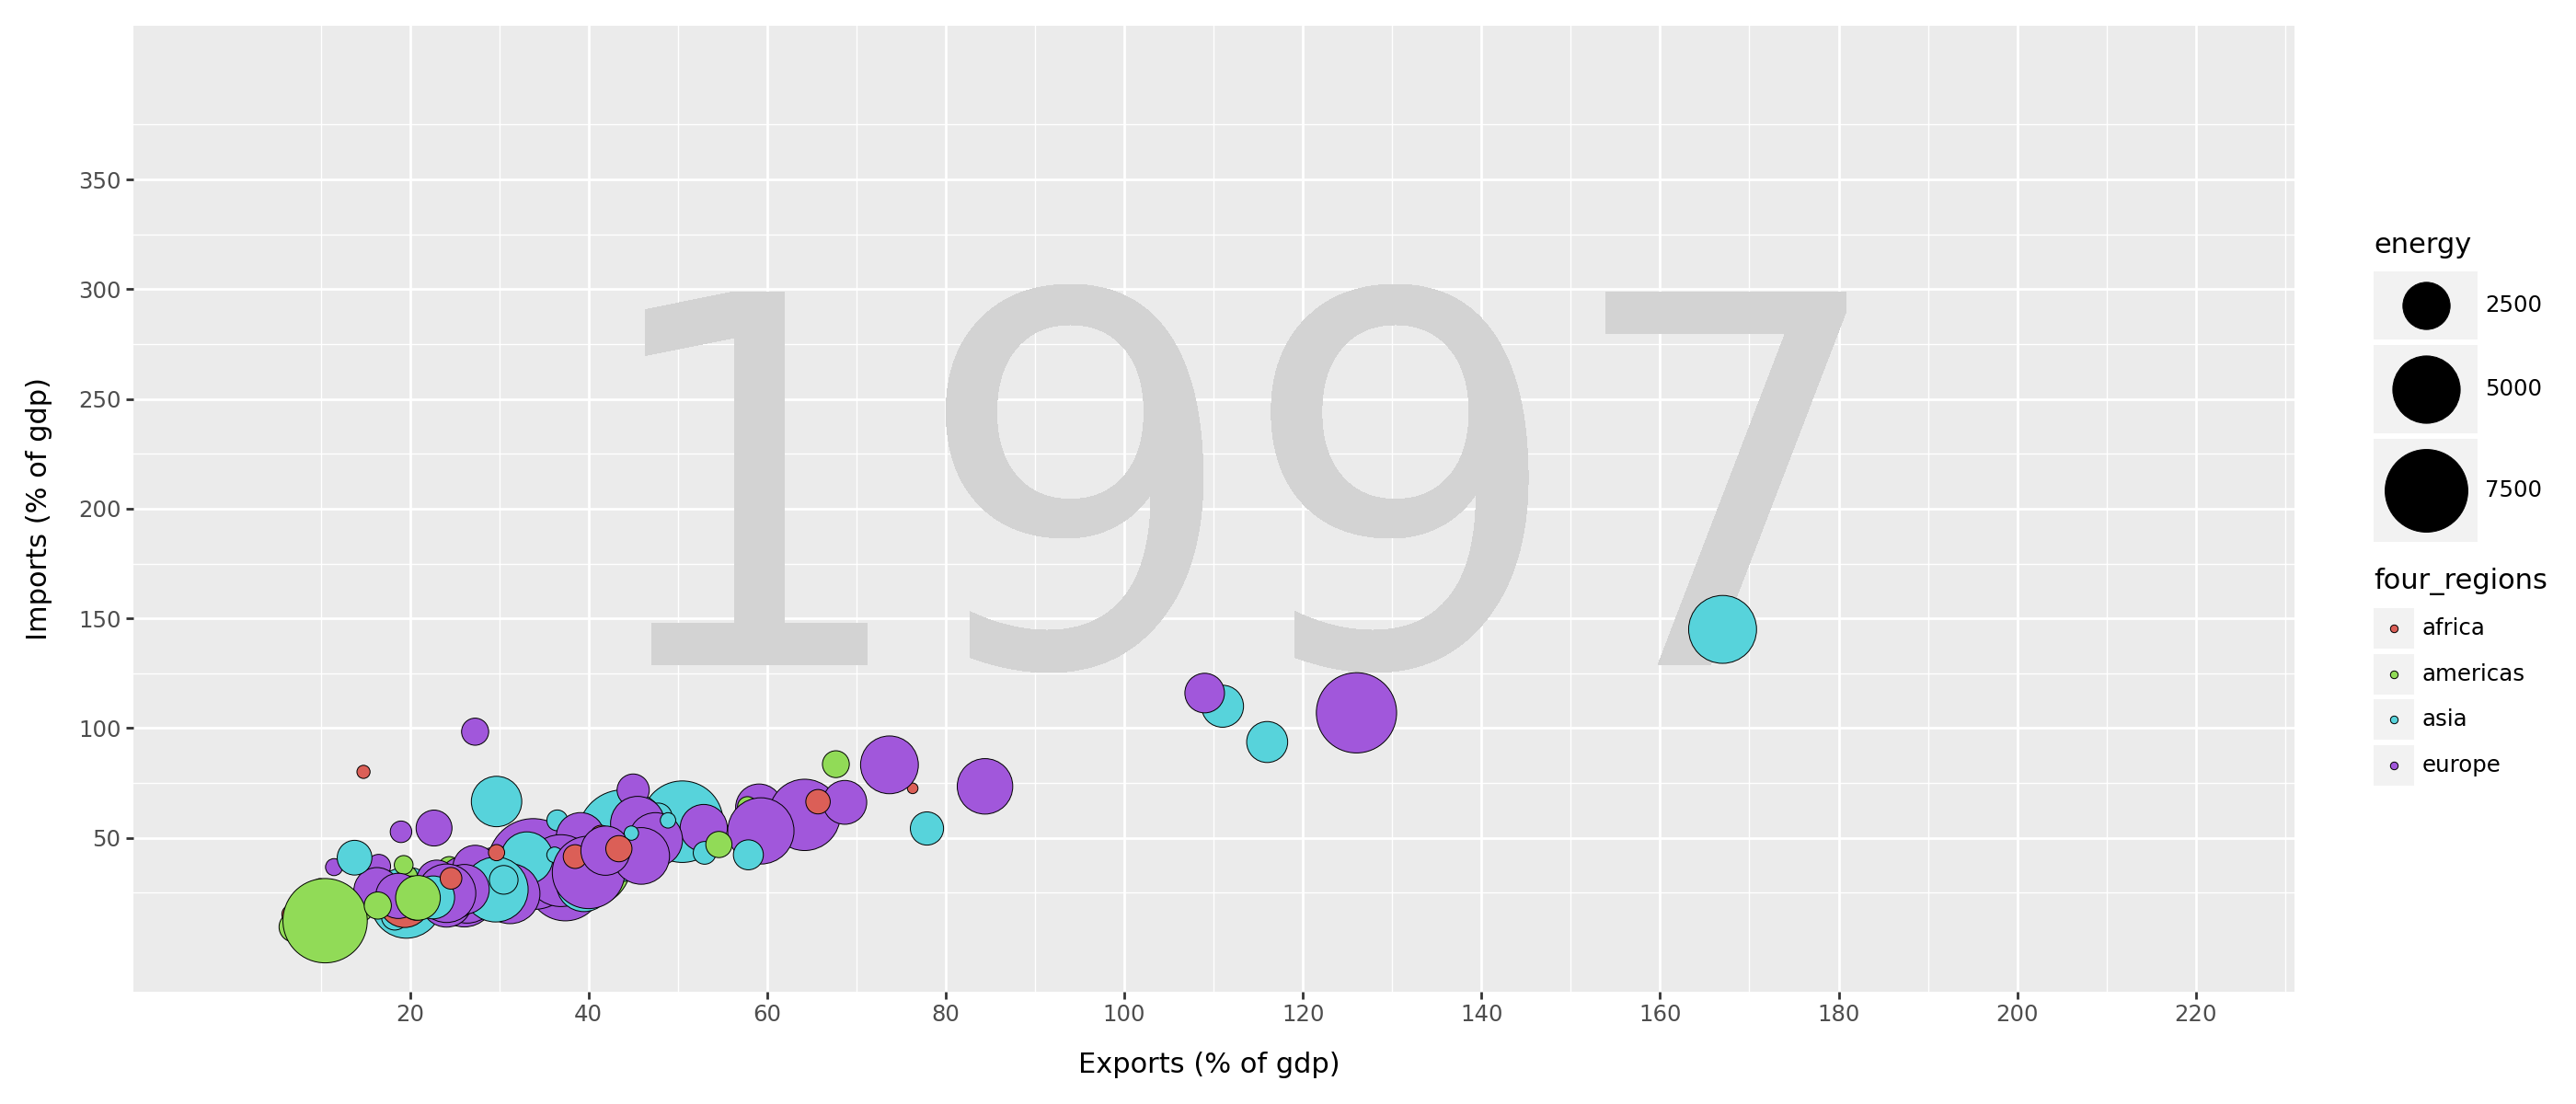

In [159]:
(ggplot(q2data_clean, aes(x='exports', y='imports', size='energy', fill='four_regions', label='country'))+
geom_text(aes(x=40, y = 80, label = "1997"), size = 200, color = "lightgrey", alpha = .1, ha='left', va="bottom") +
geom_point(color = "black", stroke = .2 )+
labs(x="Exports (% of gdp) ", y="Imports (% of gdp)")+
scale_x_continuous(limits = (0,220),breaks=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220],labels=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220])+
scale_y_continuous(limits=(0,400),breaks=range(50, 400, 50))+
scale_size_continuous(range=(0, 20)) + theme(figure_size = (14,6)))

In [81]:
print(q2data['energy'].dtype)

object


C:\Users\Luke Maier\AppData\Local\Temp\ipykernel_38072\607955969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


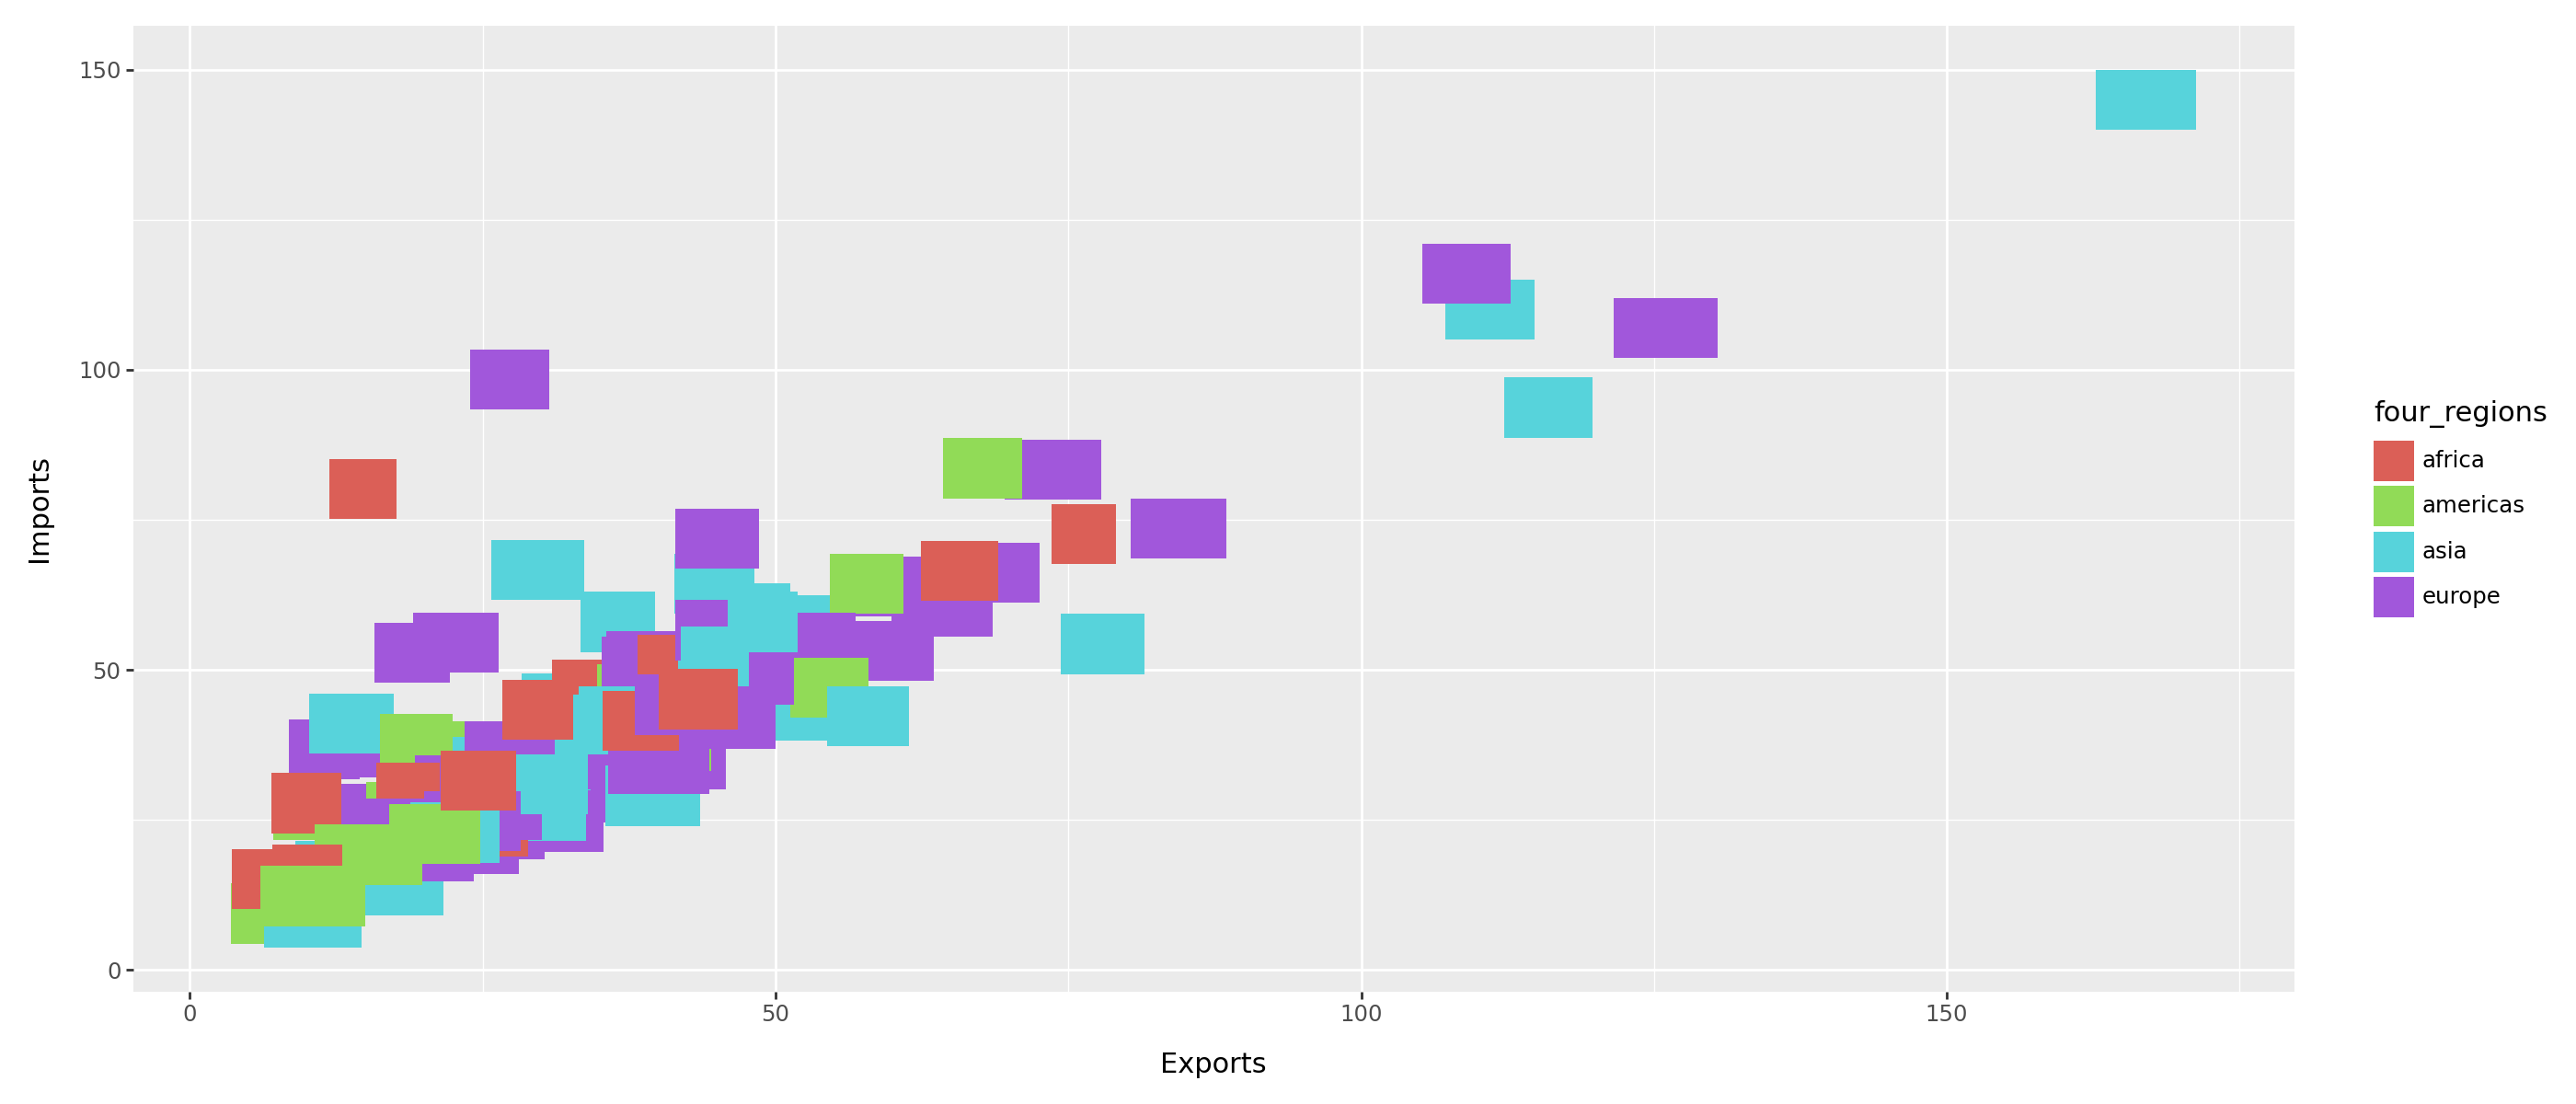

In [105]:
# 4) I could also use geom_tile here. I dislike this version as I had to log the energy in order to keep the width
# at a more manageable level, which in turn makes it less expressive

q2data_clean['energy_log'] = np.log1p(q2data_clean['energy'])

ggplot(q2data_clean, aes(x='exports', y='imports', fill='four_regions', width = 'energy_log')) + geom_tile(height=10)+ \
labs(x="Exports", y="Imports") + theme(figure_size=(14, 6))

In [116]:
# TASK 3

# GDP per capita is mapped to the y variable, individuals using internet is mapped to the x variable
# regions of the world is mapped to bubble color, and income is mapped to bubble size, label is year
q3data

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [135]:
q3data = pd.read_csv(r"C:\Users\Luke Maier\Downloads\q3data.csv")
q3data_clean = q3data.dropna()
q3data_clean

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
5,0.27000,2440.0,2900.0,2001,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
209,4.91000,10800.0,14800.0,2001,Venezuela,americas,america,america_south,Latin America & Caribbean
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


C:\Users\Luke Maier\anaconda3\lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log2


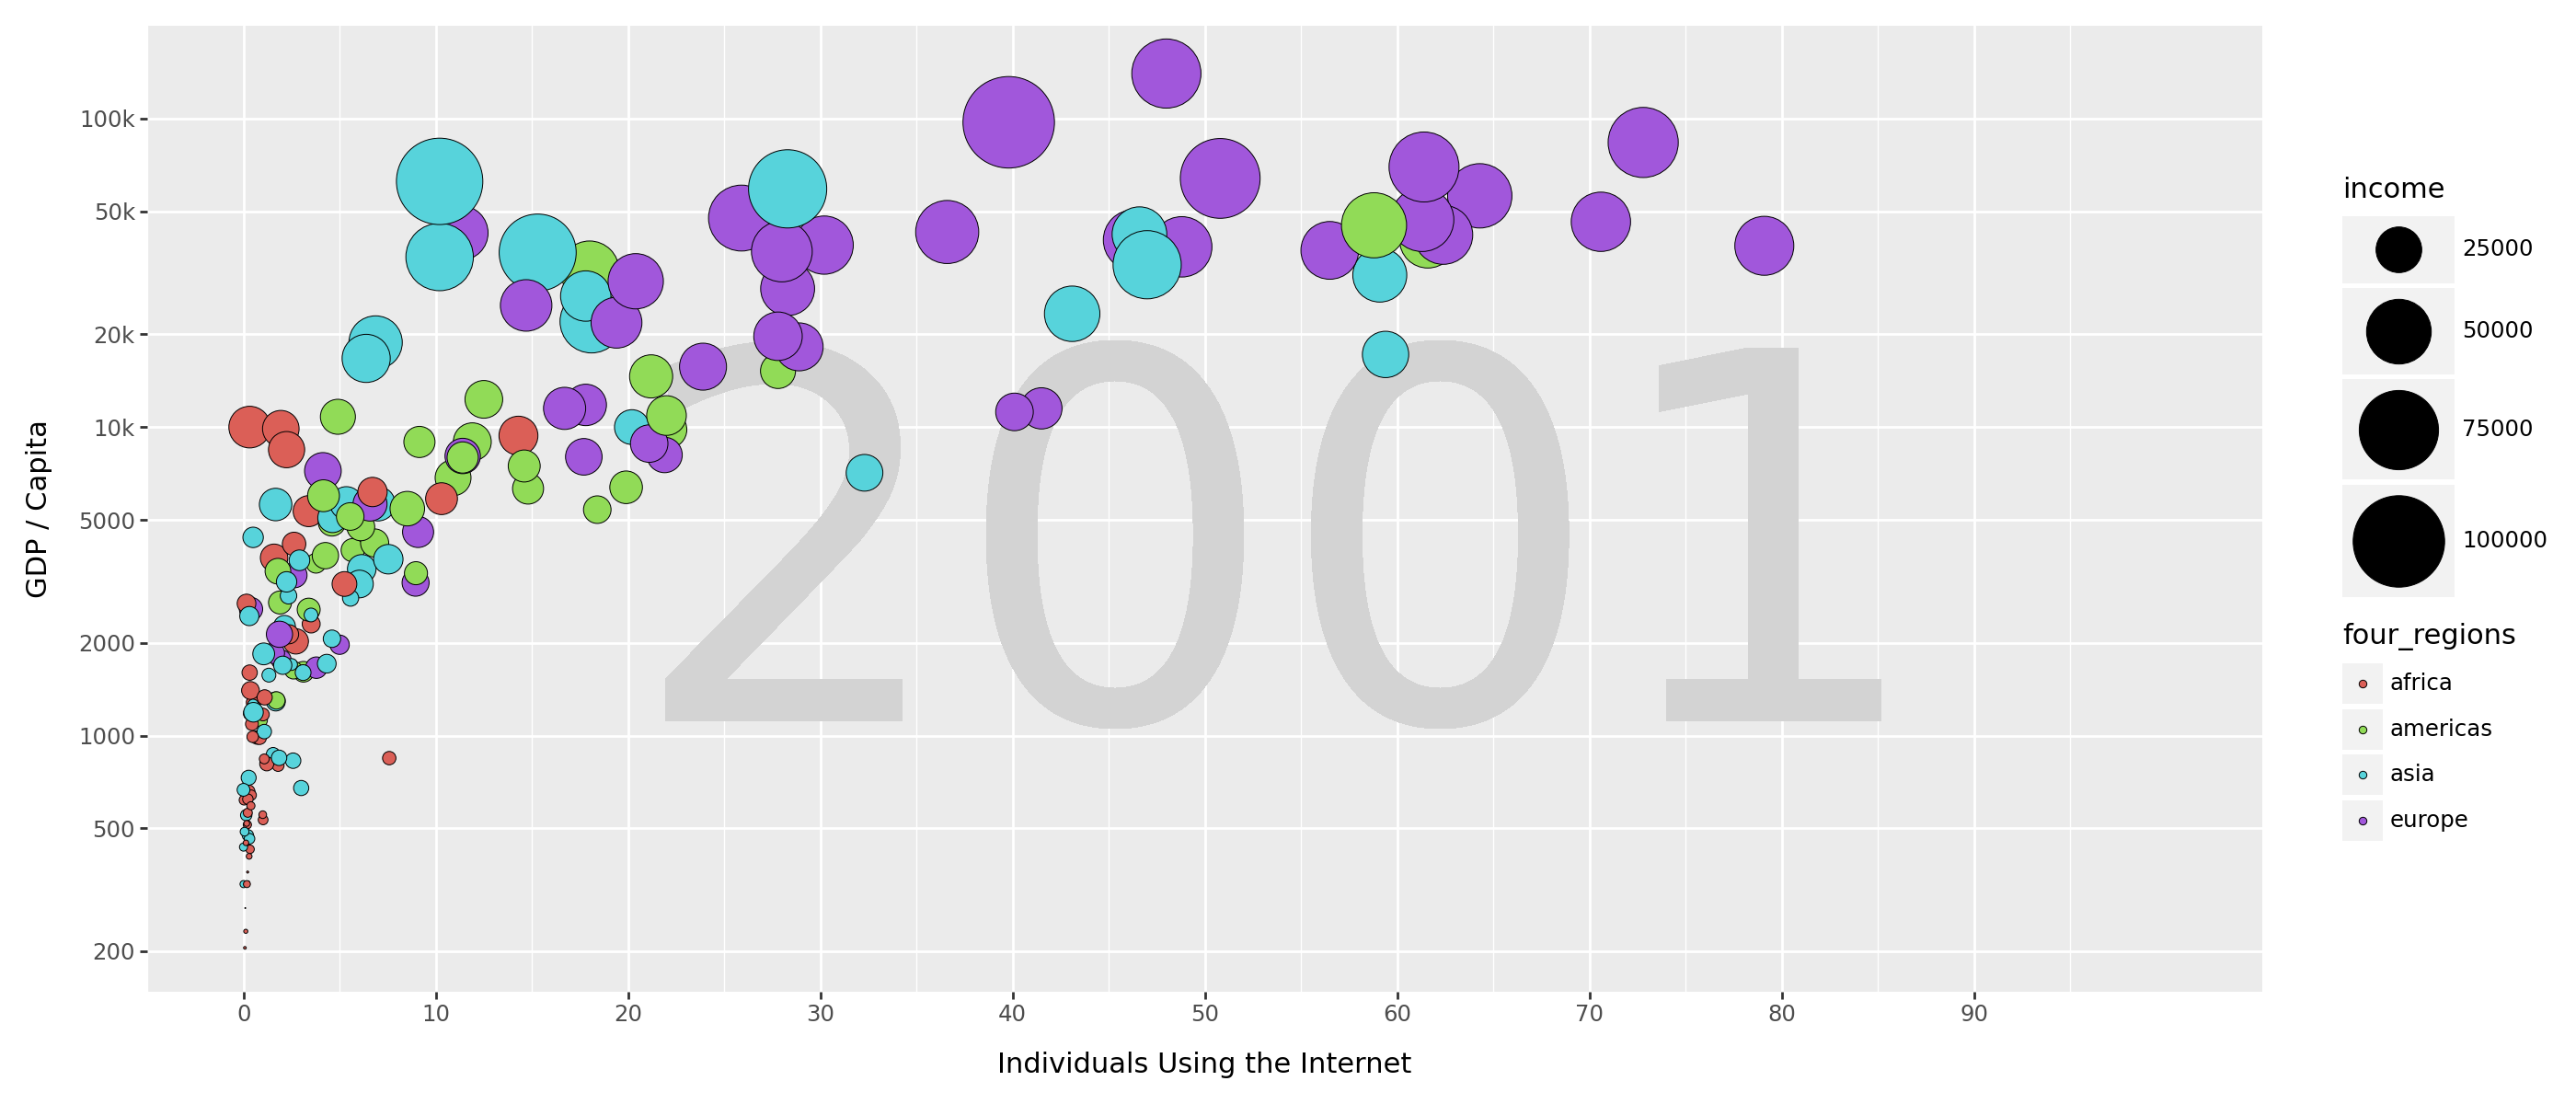

In [136]:
ggplot(q3data_clean, aes(x='internet_users', y='gdp', size='income', fill='four_regions', label='country')) + \
geom_text(aes(x=20, y=500, label="2001"), size=200, color="lightgrey", alpha=.1, ha='left', va='bottom') + \
geom_point(color="black", stroke=.2) + \
labs(x="Individuals Using the Internet", y="GDP / Capita") + \
scale_y_continuous(limits=(0, 200000), trans='log2', breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], labels=[200, 500, 1000, 2000, 5000, '10k', '20k', '50k', '100k']) + \
scale_x_continuous(limits=(0, 100), breaks=range(0, 100, 10)) + \
scale_size_continuous(range=(0, 20)) + \
theme(figure_size=(14, 6))

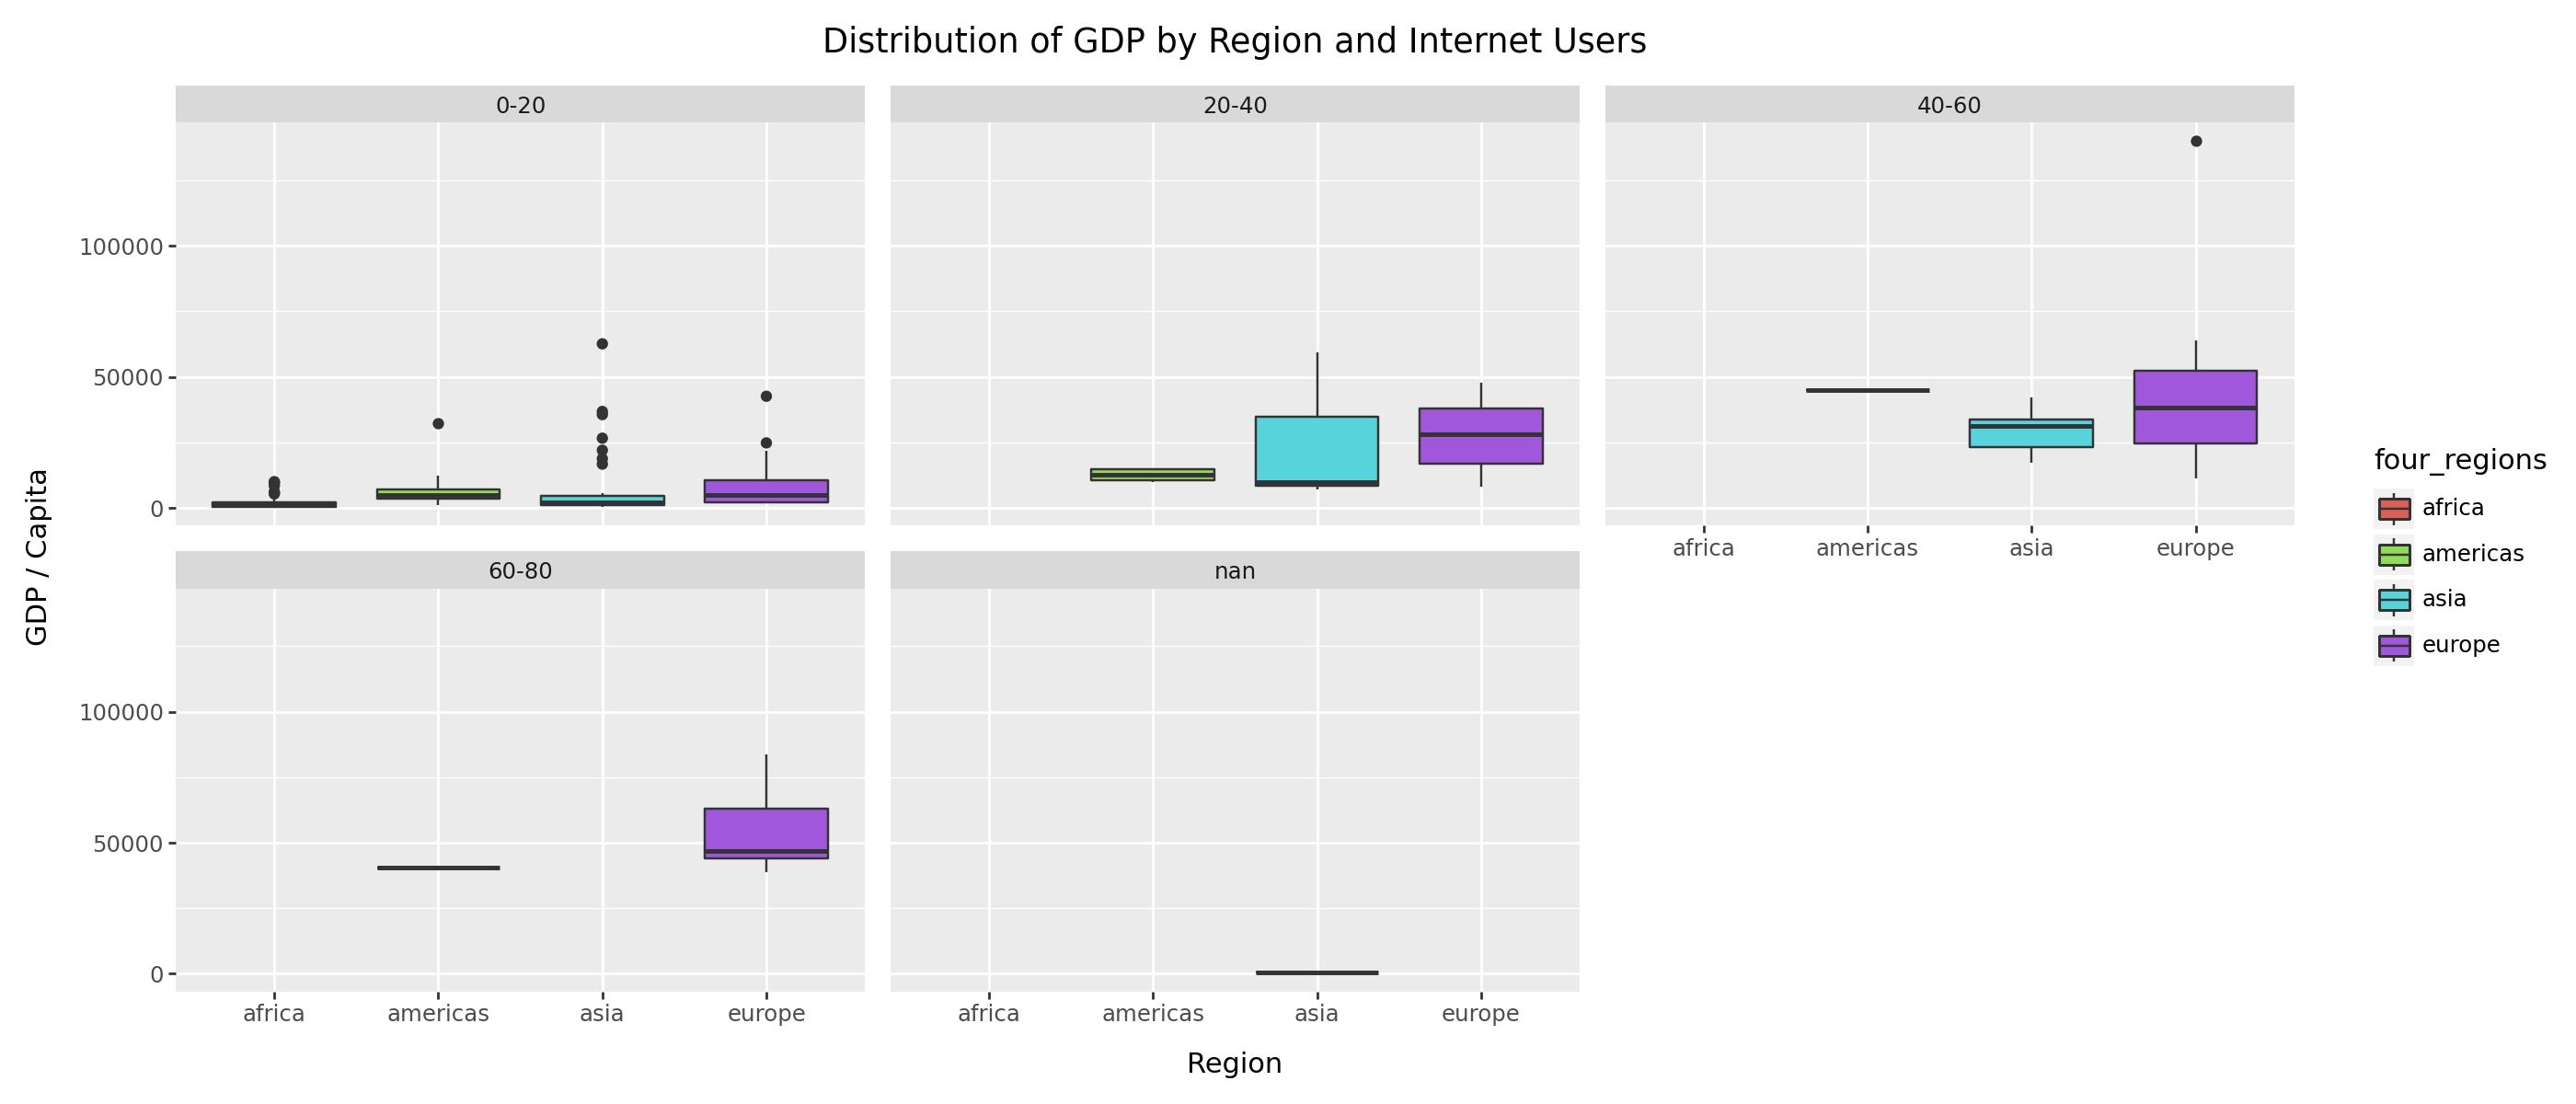

In [158]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme, facet_wrap

ggplot(q3data_clean, aes(x='four_regions', y='gdp', fill='four_regions')) + \
geom_boxplot() + \
facet_wrap('~internet_users_binned') + \
labs(x="Region", y="GDP / Capita", title="Distribution of GDP by Region and Internet Users") + \
theme(figure_size=(14, 6))

In [ ]:
# For this other geom plot I used box plots. This is far less visually appealing as to include some of the variables, I had to facet the data into multiple graphs.
# This in turn makes it more difficult to compare the entire population to each other. Using box plots is less expressive than our geom_point bubble graph